<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-fundamentals/unit03-model-training/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression Classifier

**Reference**

[Training a Logistic Regression Model in PyTorch](https://lightning.ai/pages/courses/deep-learning-fundamentals/3-0-overview-model-training-in-pytorch/3-6-training-a-logistic-regression-model-in-pytorch-parts-1-3/)

[Deep Learning Fundamentals: Code Materials and Exercises](https://github.com/Lightning-AI/dl-fundamentals)

##Setup

In [20]:
import pandas as pd
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/rahiakela/deep-learning-research-and-practice/raw/main/deep-learning-fundamentals/unit01-ml-intro/perceptron_toydata-truncated.txt

##Dataset

In [3]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [4]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values

x_train = torch.from_numpy(x_train).to(torch.float32)
y_train = torch.from_numpy(y_train)

print(x_train.shape, y_train.shape)
x_train[:5]

torch.Size([20, 2]) torch.Size([20])


tensor([[ 0.7700, -1.1400],
        [-0.3300,  1.4400],
        [ 0.9100, -3.0700],
        [-0.3700, -1.9100],
        [-0.6300, -1.5300]])

In [5]:
x_train.shape, y_train.shape

(torch.Size([20, 2]), torch.Size([20]))

In [6]:
np.bincount(y_train)

array([10, 10])

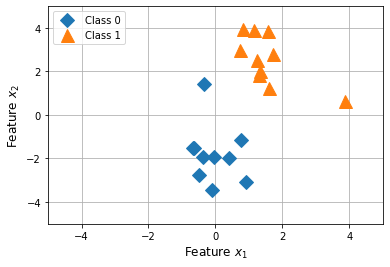

In [7]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [8]:
# normalize data
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)

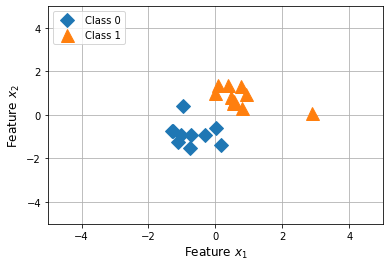

In [9]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

##Defining model

<img src='https://github.com/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-fundamentals/unit01-ml-intro/images/perceptron-sketch.png?raw=1'/>

In [10]:
class LogisticRegression(torch.nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.linear = torch.nn.Linear(num_features, 1)

  def forward(self, x):
    logits = self.linear(x)
    probas = torch.sigmoid(logits)
    return probas

In [11]:
torch.manual_seed(1)

model = LogisticRegression(num_features=2)

In [12]:
x = torch.tensor([1.1, 1.2])

with torch.no_grad():
  proba = model(x)

print(proba)

tensor([0.4723])


##Defining DataLoader

In [17]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.features = torch.tensor(X, dtype=torch.float32)
    self.labels = torch.tensor(y, dtype=torch.float32)

  def __getitem__(self, index):
    x = self.features[index]
    y = self.labels[index]
    return x, y

  def __len__(self):
    return self.labels.shape[0]

In [ ]:
train_ds = MyDataset(x_train, y_train)

train_loader = DataLoader(dataset=train_ds, batch_size=10, shuffle=True)

##Training model

In [21]:
torch.manual_seed(1)

model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
num_epochs = 20

In [22]:
for epoch in range(num_epochs):
  model = model.train()
  for batch_idx, (features, class_labels) in enumerate(train_loader):
    probas = model(features)
    loss = F.binary_cross_entropy(probas, class_labels.view(probas.shape))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## LOGGING
    print(f"Epoch: {epoch+1:03d}/{num_epochs:03d} | Batch {batch_idx:03d}/{len(train_loader):03d} | Loss: {loss:.2f}")

Epoch: 001/020 | Batch 000/002 | Loss: 0.67
Epoch: 001/020 | Batch 001/002 | Loss: 0.73
Epoch: 002/020 | Batch 000/002 | Loss: 0.67
Epoch: 002/020 | Batch 001/002 | Loss: 0.67
Epoch: 003/020 | Batch 000/002 | Loss: 0.60
Epoch: 003/020 | Batch 001/002 | Loss: 0.68
Epoch: 004/020 | Batch 000/002 | Loss: 0.70
Epoch: 004/020 | Batch 001/002 | Loss: 0.54
Epoch: 005/020 | Batch 000/002 | Loss: 0.61
Epoch: 005/020 | Batch 001/002 | Loss: 0.57
Epoch: 006/020 | Batch 000/002 | Loss: 0.59
Epoch: 006/020 | Batch 001/002 | Loss: 0.55
Epoch: 007/020 | Batch 000/002 | Loss: 0.52
Epoch: 007/020 | Batch 001/002 | Loss: 0.58
Epoch: 008/020 | Batch 000/002 | Loss: 0.52
Epoch: 008/020 | Batch 001/002 | Loss: 0.54
Epoch: 009/020 | Batch 000/002 | Loss: 0.52
Epoch: 009/020 | Batch 001/002 | Loss: 0.50
Epoch: 010/020 | Batch 000/002 | Loss: 0.54
Epoch: 010/020 | Batch 001/002 | Loss: 0.44
Epoch: 011/020 | Batch 000/002 | Loss: 0.42
Epoch: 011/020 | Batch 001/002 | Loss: 0.53
Epoch: 012/020 | Batch 000/002 |

##Evaluating results

In [23]:
probas

tensor([[0.6629],
        [0.6729],
        [0.2237],
        [0.7318],
        [0.2209],
        [0.5695],
        [0.3245],
        [0.6439],
        [0.4303],
        [0.2669]], grad_fn=<SigmoidBackward0>)

In [24]:
pred = torch.where(probas > 0.5, 1, 0)
pred

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [25]:
class_labels.view(pred.shape).to(pred.dtype)

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [26]:
sum([True, False, True])

2

In [27]:
def compute_accuracy(model, dataloader):
  model = model.eval()
  correct = 0.0
  total_examples = 0

  for batch_idx, (features, class_labels) in enumerate(train_loader):
    with torch.no_grad():
      probas = model(features)
    pred = torch.where(probas > 0.5, 1, 0)

    label = class_labels.view(pred.shape).to(pred.dtype)

    compare = label == pred
    correct += torch.sum(compare)
    total_examples += len(compare)
  
  return correct / total_examples

In [28]:
train_acc = compute_accuracy(model, train_loader)
print(f"Accuracy: {train_acc * 100}%")

Accuracy: 100.0%


##Decision Boundary

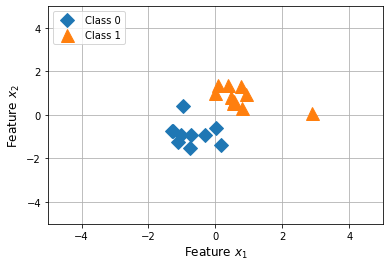

In [13]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [29]:
def plot_boundary(model):
  w1 = model.linear.weight[0][0].detach()
  w2 = model.linear.weight[0][1].detach()
  b = model.linear.bias[0].detach()

  x1_min = -20
  x2_min = (-(w1 * x1_min) - b) / w2

  x1_max = 20
  x2_max = (-(w1 * x1_max) - b) / w2

  return x1_min, x1_max, x2_min, x2_max

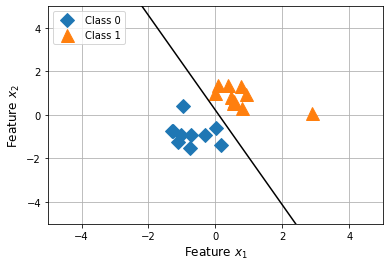

In [30]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(model)

plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()